#Daily exchange rates USD-REAL between 2000 and 2021:
###Group Members:



*   Arthur França Pessoa da Cunha Lima
*   Thiago Maia Souto







In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#0. Dataset 1

### Initialy we used the dataset that can be found here(adicionar link) which contains daily exchange rates from multiples currency around the world.

In [ ]:
dataset1="/content/gdrive/MyDrive/Dataquest/ECB_FX_USD-base.csv"
dollar=pd.read_csv(dataset1,sep=",")
dollar=dollar.drop(dollar.index[0])
dollar.head(5)


,Date,EUR,JPY,BGN,CZK,DKK,GBP,HUF,PLN,RON,SEK,CHF,ISK,NOK,HRK,RUB,TRL,TRY,AUD,BRL,CAD,CNY,HKD,IDR,ILS,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR
1,2021-11-18,0.881445570736007,114.2177170559718,1.7239312472454824,22.238871749669457,6.554605553107096,0.7419391802556191,320.5729396209784,4.104451300132217,4.362891141472014,8.863375936535919,0.9264874394006168,131.15910092551786,8.772410753635961,6.621419127368884,73.0013221683561,0.0,11.064081092992506,1.3732921992066989,5.538915821947994,1.260026443367122,6.38334067871309,7.7889819303658,14224.856765094755,3.079858968708682,74.23358307624504,1183.1291317761127,20.767298369325694,4.181489643014544,1.419656236227413,50.32966064345526,1.3581313353900395,32.63992948435434,15.620185103569854
2,2021-11-17,0.8837044892188053,114.68716861081656,1.7283492400141394,22.287027218098267,6.5716684340756455,0.7431071049840934,322.31353835277486,4.115500176740898,4.373718628490633,8.863821138211383,0.9305408271474019,132.37893248497704,8.739395546129375,6.638034641215977,72.53366914103924,0.0,10.480823612583952,1.3715977377165076,5.481442205726405,1.2553905973842348,6.377695298692117,7.78897136797455,14243.001060445387,3.0627430187345355,74.25768822905621,1181.8840579710147,20.70157299399081,4.17903852951573,1.428243195475433,50.32166843407565,1.3577235772357725,32.66967126193001,15.480381760339345
3,2021-11-16,0.8796622097114708,114.25932441942292,1.7204433497536946,22.191238564391274,6.541783954961295,0.7436048557353976,322.26425052779734,4.094387755102041,4.353712174524983,8.822396199859254,0.9261083743842364,132.3011963406052,8.696604503870514,6.606175228712174,73.18200211118929,0.0,10.205840957072484,1.3625967628430682,5.439655172413793,1.2533427163969035,6.388722730471499,7.788881069669247,14234.931386347642,3.0918367346938775,74.36699507389163,1181.3863476425051,20.62130541871921,4.165992258972555,1.4238212526389866,50.33866995073892,1.3540640394088668,32.68209007741027,15.233726249120336
4,2021-11-15,0.8738203425375742,113.87626703949667,1.7090178259349875,22.03512757777001,6.499038797623208,0.7441890947221251,319.80076896190144,4.052254456483747,4.325061167423978,8.744320167773505,0.9203949667948268,131.42257951765117,8.665938483047883,6.564837469416288,72.36184900384481,0.0,10.017738552953512,1.357654666200629,5.457707095421181,1.2525340789933588,6.381859489688919,7.790632645927996,14178.337993708494,3.1021495980426423,74.39968542467668,1179.9720377490387,20.543254106955608,4.1614819993009435,1.4133170220202724,50.077770010485835,1.3506641034603286,32.705347780496325,15.164715134568333
5,2021-11-12,0.8735150244584207,113.99371069182389,1.708420684835779,22.04577218728162,6.496331236897275,0.7468990216631726,319.83752620545073,4.055555555555555,4.322851153039832,8.742575122292102,0.9231306778476589,131.37665967854647,8.692173305380852,6.562106918238993,72.20903214535291,0.0,9.9569357092942,1.370545073375262,5.4072327044025155,1.2592592592592593,6.380765199161425,7.7922781271837875,14185.80538085255,3.1097134870719776,74.41736547868624,1178.4591194968552,20.656184486373167,4.165967854647099,1.4232180293501047,49.785988819007684,1.353424178895877,32.780398322851156,15.27943745632425


In [ ]:
dollar.info()



*  Copy BRL column into a new dataframe to better analyses of data.




In [ ]:
real_to_dollar_new = dollar[['Date', 'BRL']].copy()
real_to_dollar_new

,Date,BRL
1,2021-11-18,5.538915821947994
2,2021-11-17,5.481442205726405
3,2021-11-16,5.439655172413793
4,2021-11-15,5.457707095421181
5,2021-11-12,5.4072327044025155
...,...,...
5855,1999-01-08,0.0
5856,1999-01-07,0.0
5857,1999-01-06,0.0
5858,1999-01-05,0.0



*  Convert BRL column into float and Date column into datetime shape.

In [ ]:
real_to_dollar_new['BRL'] = real_to_dollar_new['BRL'].astype(float)
real_to_dollar_new['Date'] = pd.to_datetime(real_to_dollar_new['Date'])

In [ ]:
count_zero = real_to_dollar_new['BRL'].value_counts()
count_zero

*  After plot the data, we realized that values beteween 2000 until 2008 were null.

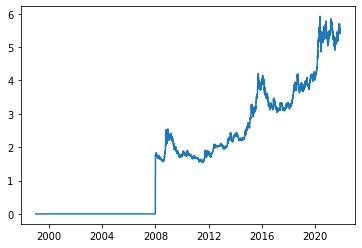

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(real_to_dollar_new['Date'], real_to_dollar_new['BRL'])
plt.show()

#1. Dataset 2
###After realize the missing data beetween 2000-2008 we decided to use a previous dataset that can be found here(adicionar link) which contains daily exchange rates from multiples currency around the world beetween 2000-2019, and merge it whith dataset1.

In [ ]:
dataset2="/content/gdrive/MyDrive/Dataquest/Foreign_Exchange_Rates.csv"
real_to_dollar_old=pd.read_csv(dataset2,sep=",")
real_to_dollar_old.head(5)

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,1128,9.4015,6.126,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,9.457,6.085,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,1135,9.535,6.07,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,1146.5,9.567,6.08,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,1138,9.52,6.057,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


*  Rename dataset2 column to look like the the column in the previous dataframe and the data were filtered to show only rates from USD-REAL.

In [ ]:
real_to_dollar_old.rename(columns={'BRAZIL - REAL/US$': 'BRL',
                               'Time Serie': 'Date'},inplace=True)
real_to_dollar_old['Date'] = pd.to_datetime(real_to_dollar_old['Date'])
real_to_dollar_old.sort_values("Date", inplace=True,ascending=False)
real_to_dollar_old.reset_index(drop=True, inplace=True)
real_to_dollar_old = real_to_dollar_old[['Date', 'BRL']].copy()
real_to_dollar_old.tail(5)

,Date,BRL
5212,2000-01-07,1.831
5213,2000-01-06,1.84
5214,2000-01-05,1.856
5215,2000-01-04,1.8405
5216,2000-01-03,1.805


*  Filter the dataset2 to only show  values there were missing in dataset1.

In [ ]:
real_to_dollar_old=real_to_dollar_old[(real_to_dollar_old['Date'].dt.year < 2009) & (real_to_dollar_old['Date'].dt.year > 1994)]
real_to_dollar_new=real_to_dollar_new[(real_to_dollar_new['Date'].dt.year > 2008)]
real_to_dollar_old= real_to_dollar_old.drop(real_to_dollar_old[real_to_dollar_old["BRL"]== "ND"].index, inplace=False)
#real_to_dollar_old = real_to_dollar_old.fillna(0, inplace=True)
#real_to_dollar_old['BRL'] = real_to_dollar_old['BRL'].astype(float)

In [ ]:
real_to_dollar_old.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Date,BRL
count,2265,2265
unique,2265,1651
top,2006-07-20 00:00:00,1.805
freq,1,10
first,2000-01-03 00:00:00,NaN
last,2008-12-31 00:00:00,NaN


In [ ]:

count_ND = real_to_dollar_old['BRL'].value_counts()
count_ND

1.805     10
2.945      7
2.871      6
2.141      6
2.907      6
          ..
2.85       1
2.67       1
2.5728     1
2.1346     1
3.1365     1
Name: BRL, Length: 1651, dtype: int64

*  Merge both dataframes.

In [ ]:

frames = [real_to_dollar_new, real_to_dollar_old]

real_to_dollar = pd.concat(frames)
real_to_dollar

,Date,BRL
1,2021-11-18,5.53892
2,2021-11-17,5.48144
3,2021-11-16,5.43966
4,2021-11-15,5.45771
5,2021-11-12,5.40723
...,...,...
5212,2000-01-07,1.831
5213,2000-01-06,1.84
5214,2000-01-05,1.856
5215,2000-01-04,1.8405


*  Plot the complete USD-REAL between 2000-2021.

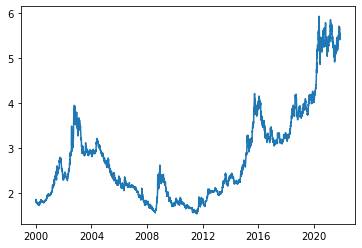

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(real_to_dollar['Date'], real_to_dollar['BRL'])
plt.show()

#2. Visualization
###For a better analyses we decidided to divide the graph into periods based on each president government of Brasil.
*  First of all, we have to divide the merged dataframe into the period of 5 presidents government in Brasil between 2000-2021.

In [ ]:
Real_Brasil = real_to_dollar.copy(
                   )[(real_to_dollar['Date'].dt.year >= 2000)]
FHC = real_to_dollar.copy(
                   )[(real_to_dollar['Date'].dt.year >= 2000) & (real_to_dollar['Date'].dt.year < 2003)]
LULA = real_to_dollar.copy(
       )[(real_to_dollar['Date'].dt.year >= 2003) & (real_to_dollar['Date'].dt.year < 2011)]
DILMA= real_to_dollar.copy(
       )[(real_to_dollar['Date'].dt.year >= 2010) & (real_to_dollar['Date'].dt.year < 2017)]
TEMER = real_to_dollar.copy(
       )[(real_to_dollar['Date'].dt.year >= 2017) & (real_to_dollar['Date'].dt.year < 2018)]
BOLSONARO = real_to_dollar.copy(
       )[(real_to_dollar['Date'].dt.year >= 2018) ]
FHC.head(5)

,Date,BRL
4435,2002-12-31,3.54
4436,2002-12-30,3.545
4437,2002-12-27,3.554
4438,2002-12-26,3.541
4440,2002-12-24,3.51


*  We used the rolling mean to reduce in half the amount of data for better visualization.

In [ ]:
FHC['BRL'] = FHC['BRL'].rolling(2).mean()
LULA['BRL'] = LULA['BRL'].rolling(2).mean()
DILMA['BRL'] = DILMA['BRL'].rolling(2).mean()
TEMER['BRL'] = TEMER['BRL'].rolling(2).mean()
BOLSONARO['BRL'] = BOLSONARO['BRL'].rolling(2).mean()
#plt.plot(FHC['Date'], FHC['BRL'])
#plt.show()

*  Finally we obtained the main graphic.

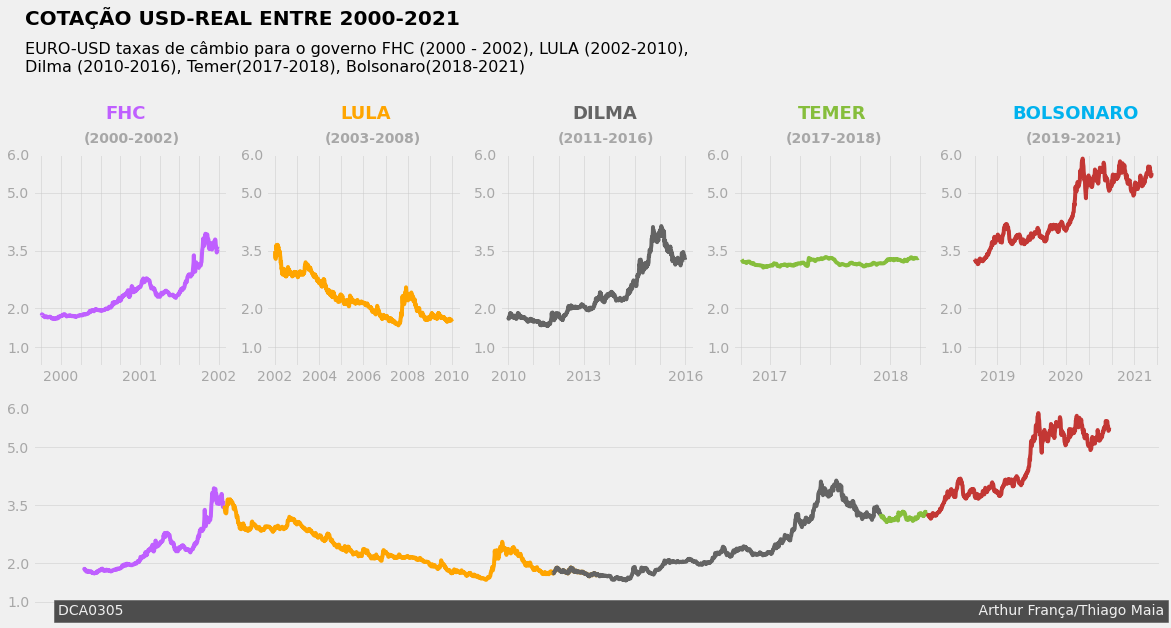

In [ ]:
import matplotlib.style as style
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(18, 8))
ax1 = plt.subplot(2,5,1)
ax2 = plt.subplot(2,5,2)
ax3 = plt.subplot(2,5,3)
ax4 = plt.subplot(2,5,4)
ax5 = plt.subplot(2,5,5)
ax6 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.5, 2.0)
    ax.set_yticks([1.0, 2.0, 3.5, 5.0, 6.0])
    ax.set_yticklabels(['1.0', '2.0','3.5', '5.0','6.0'],
                   alpha=0.3)
    ax.set_xticklabels([])
    ax.grid(alpha=0.5)    
    

### Ax1: FHC
ax1.plot(FHC['Date'], FHC['BRL'],
        color='#BF5FFF')
ax1.set_xticklabels(['', '2000', '','','', '2001', '','','', '2002'],
                   alpha=0.3)
ax1.text(730516.0, 6.92, 'FHC', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(730380.0, 6.3, '(2000-2002)', weight='bold',
        alpha=0.3)


### Ax2: Lula
ax2.plot(LULA['Date'], LULA['BRL'],
        color='#ffa500')
ax2.set_xticklabels(['', '2002', '', '2004', '', '2006', '',
                     '2008', '', '2010'],
                   alpha=0.3)
ax2.text(732288.0, 6.92, 'LULA', fontsize=18, weight='bold',
        color='#ffa500')
ax2.text(732038.0, 6.3, '(2003-2008)', weight='bold',
         alpha=0.3)


### Ax3: Dilma
ax3.plot(DILMA['Date'], DILMA['BRL'],
        color='#646464')
ax3.set_xticklabels(['','2010', '','','2013', '',
                     '', '','2016'],
                   alpha=0.3)
ax3.text(734705.0, 6.92, 'DILMA', fontsize=18, weight='bold',
        color='#646464')
ax3.text(734485.0, 6.3, '(2011-2016)', weight='bold',
         alpha=0.3)

### Ax4: Temer
ax4.plot(TEMER['Date'], TEMER['BRL'],
        color='#86BE3C')
ax4.set_xticklabels(['', '2017', '', '',
                     '', '2018', ''],
                   alpha=0.3)
ax4.text(736445.0, 6.92, 'TEMER', fontsize=18, weight='bold',
        color='#86BE3C')
ax4.text(736420.0, 6.3, '(2017-2018)', weight='bold',
         alpha=0.3)
### Ax5: Bolsonaro
ax5.plot(BOLSONARO['Date'], BOLSONARO['BRL'],
        color='#C33734')
ax5.set_xticklabels(['', '2019', '','', '2020', '','','2021', ''],
                   alpha=0.3)
ax5.text(737000.0, 6.92, 'BOLSONARO', fontsize=18, weight='bold',
        color='#00B2EE')
ax5.text(737100.0, 6.3, '(2019-2021)', weight='bold',
         alpha=0.3)
### Ax6: Presidentes
ax6.plot(FHC['Date'], FHC['BRL'],
        color='#BF5FFF')
ax6.plot(LULA['Date'], LULA['BRL'],
        color='#ffa500')
ax6.plot(DILMA['Date'], DILMA['BRL'],
        color='#646464')
ax6.plot(TEMER['Date'], TEMER['BRL'],
        color='#86BE3C')
ax6.plot(BOLSONARO['Date'], BOLSONARO['BRL'],
        color='#C33734')
ax6.grid(alpha=0.5)
ax6.set_xticks([])
### Adding a title and a subtitle
ax1.text(730016.0, 9.35, 'COTAÇÃO USD-REAL ENTRE 2000-2021',
         fontsize=20, weight='bold')
ax1.text(730016.0, 8.14, '''EURO-USD taxas de câmbio para o governo FHC (2000 - 2002), LULA (2002-2010),
Dilma (2010-2016), Temer(2017-2018), Bolsonaro(2018-2021)''',
        fontsize=16)

### Adding a signature
ax6.text(729916.0, 0.65, 'DCA0305' + ' '*190 + 'Arthur França/Thiago Maia',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.savefig("presidentes.png")

In [ ]:
crises_covid = real_to_dollar.copy(
                   )[(real_to_dollar['Date'].dt.year >= 2016) & (real_to_dollar['Date'].dt.year < 2021)]
crises_covid_19_20 = real_to_dollar.copy(
                   )[(real_to_dollar['Date'].dt.year >= 2019) & (real_to_dollar['Date'].dt.year < 2021)]

#3. Crises Visualization
###Now we made a graphic focusing in the peak of the coronavirus in Brasil, to analyse how it afects the REAL.

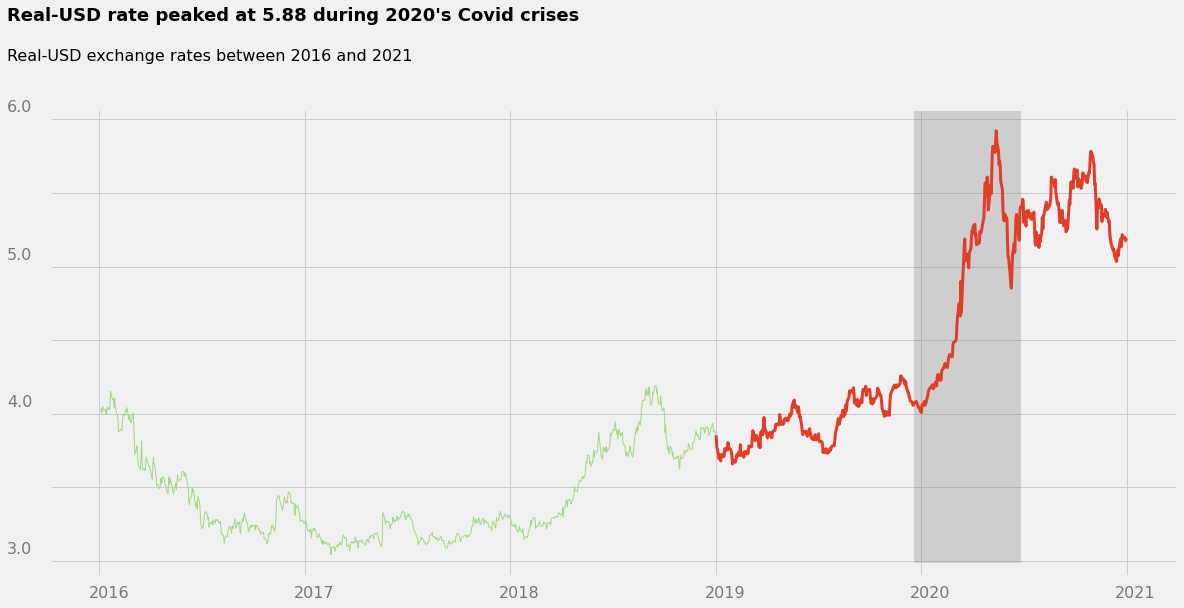

In [ ]:
import matplotlib.style as style
style.use('fivethirtyeight')

### Adding the plot
fig,ax = plt.subplots(figsize=(18,8))
ax.plot(crises_covid['Date'],
        crises_covid['BRL'],
        linewidth=1, color='#A6D785')

### Highlighting the 2007-2008 period
ax.plot(crises_covid_19_20['Date'],
        crises_covid_19_20['BRL'],
        linewidth=3, color='#e23d28')

### Highlihting the peak of the crisis
ax.axvspan(xmin=737412.0, xmax=737602.0, ymin=0.03,
           alpha=0.3, color='grey')
    
### Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 735945.0
for year in ['2016', '2017', '2018', '2019', '2020','2021']:
    ax.text(x, 2.75, year, alpha=0.5, fontsize=16)
    x += 365

y = 3.05   
for rate in ['3.0', '4.0', '5.0', '6.0']:
    ax.text(735800.0, y, rate, alpha=0.5, fontsize=16)
    y += 1.0

## Adding a title and a subtitle    
ax.text(735800.0, 6.67, "Real-USD rate peaked at 5.88 during 2020's Covid crises",
        weight='bold',fontsize=18)
ax.text(735800, 6.40, 'Real-USD exchange rates between 2016 and 2021',
        size=16)
plt.savefig("Crise_covid.png")